# EDA  Projects  Begins Here

In [195]:
# Importing libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot  as plt

import seaborn as sbn

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import  LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Importing the data file

In [196]:
data= pd.read_csv('loan_data.csv')

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Urban,Y
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,LP001184,Male,Yes,0,Graduate,No,3166,0,85,360,1,Urban,N
147,LP001185,Female,No,0,Graduate,No,1917,0,50,360,1,Rural,N
148,LP001186,Male,Yes,0,Graduate,No,3333,0,85,360,1,Urban,N
149,LP001187,Male,Yes,0,Graduate,No,3166,0,85,360,1,Urban,N


### Initial Exploration

In [197]:
print("The shape  of the data is:",data.shape)


print("The columns in the data file is:", data.columns)

print("\n Data Types:")

print(data.dtypes)

print("\n First Five Rows")

print(data.head)

The shape  of the data is: (151, 13)
The columns in the data file is: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

 Data Types:
Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area        object
Loan_Status          object
dtype: object

 First Five Rows
<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes 

In [198]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            5
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Seeing the distribution of columns

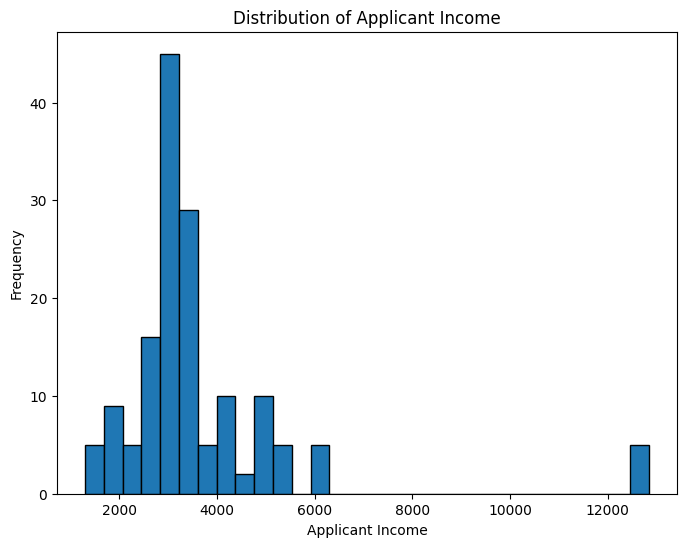


 Applicant ncome Statistics
count      151.000000
mean      3680.443709
std       1971.935035
min       1299.000000
25%       3036.000000
50%       3200.000000
75%       3833.000000
max      12841.000000
Name: ApplicantIncome, dtype: float64


In [199]:
plt.figure(figsize=(8,6))

plt.hist(data['ApplicantIncome'], bins=30, edgecolor="black")

plt.title("Distribution of Applicant Income")

plt.xlabel("Applicant Income")

plt.ylabel("Frequency")

plt.show()

print("\n Applicant ncome Statistics")

print(data['ApplicantIncome'].describe())

### Check which Gender are provided loan more often

In [200]:
if 'Gender' in data.columns and 'Loan_Status'in data.columns:
    loan_by_gender = data.groupby('Gender')['Loan_Status'].value_counts(normalize=True).unstack()
    print("\n Loan approval by Gender:")
    print(loan_by_gender)


 Loan approval by Gender:
Loan_Status         N         Y
Gender                         
Female       0.600000  0.400000
Male         0.439716  0.560284


### Visualizing the above data

<Figure size 800x600 with 0 Axes>

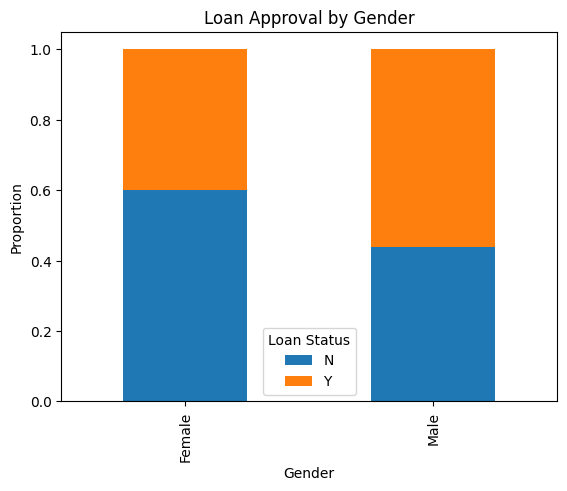

In [201]:
plt.figure(figsize=(8,6))

loan_by_gender.plot(kind="bar", stacked = True)

plt.title("Loan Approval by Gender")

plt.xlabel("Gender")

plt.ylabel("Proportion")

plt.legend(title= 'Loan Status')

plt.show()

###  Seeing the distribution of all numeric columns

In [202]:
numeric_cols = data.select_dtypes(include = [np.number]).columns

numeric_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### Creating the histogram for all numeric columns

<Figure size 1500x2000 with 0 Axes>

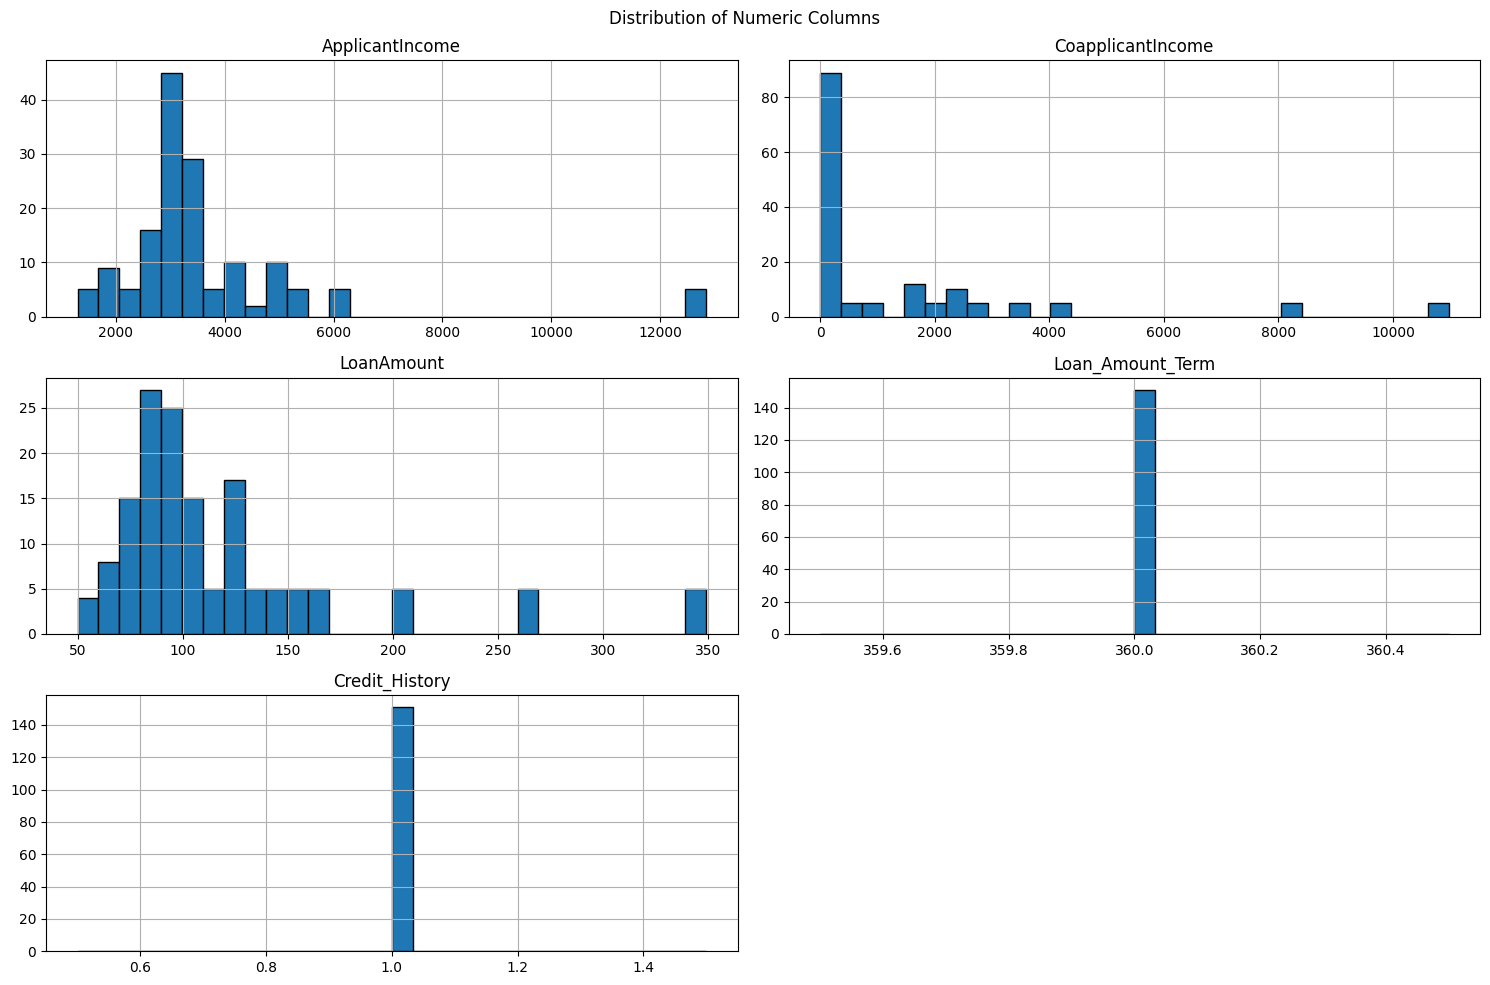

In [203]:
plt.figure(figsize= (15,20))

data[numeric_cols].hist(bins=30, figsize=(15,10), edgecolor="black")

plt.suptitle("Distribution of Numeric Columns")

plt.tight_layout()

plt.show()

### Checking if people provided with loan have higher income

In [204]:
if 'Loan_Status' in data.columns and 'ApplicantIncome' in data.columns:
    approved_income = data[data['Loan_Status']== 'Y']['ApplicantIncome']

    rejected_income = data[data['Loan_Status']== 'N']['ApplicantIncome']

print(approved_income)

0      4583
1      3000
2      2583
3      6000
4      5417
       ... 
112    3500
113    3333
114    3833
115    3166
116    3166
Name: ApplicantIncome, Length: 83, dtype: int64


### T-Testing to check significance

In [205]:
t_stat, p_value = stats.ttest_ind(approved_income, rejected_income, nan_policy='omit')

print(f"\n Income Comparison:")

print(f"Approved applicants mean income: {approved_income.mean():.2f}")

print(f"Rejected applicant mean income is: {rejected_income.mean():.2f}")

print(f"T-Statistic: {t_stat:.4f}, P_value: {p_value:.4f}")


 Income Comparison:
Approved applicants mean income: 3767.96
Rejected applicant mean income is: 3573.62
T-Statistic: 0.6013, P_value: 0.5486


In [206]:
if p_value < 0.05:
    print("Significant difference in income between approved and rejected applicants")
else:
    print("No significant differences in income between approved and rejected applicants.")

No significant differences in income between approved and rejected applicants.


### Checking Null Values Presence in Data

In [207]:
print("\n No. of null values in data")
print(data.isnull().sum())


 No. of null values in data
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            5
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


### Separating the numeric_columns and categorical_columns

In [208]:
numeric_cols = data.select_dtypes(include = [np.number]).columns

categorical_cols = data.select_dtypes(include= ['object']).columns

In [209]:
print(numeric_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [210]:
print(categorical_cols)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


### Skewness Means Comparison of Mean, Median 

#### If Mean>Median, it is Right-Skewed and vice-versa for Left-Skewed and Mean=Median means Symmetric

### Checking Skewness of Numerical_Cols

In [211]:
numeric_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [212]:
print(data['CoapplicantIncome'].mean())


1382.3576158940398


In [213]:
print(data['ApplicantIncome'].mean())

print(data['ApplicantIncome'].median())

3680.4437086092717
3200.0


### Creating a copy for imputation

In [214]:
data_imputed = data.copy()


### Imputing categorical columns with mode

In [215]:
for col in categorical_cols:
    if data[col].isnull().sum() >0:
        mode_val = data_imputed[col].mode()[0]
        data_imputed[col].fillna(mode_val, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15740\896615902.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_imputed[col].fillna(mode_val, inplace=True)


### Imputing the numerical columns with median

In [216]:
for col in numeric_cols:
    if data_imputed[col].isnull().sum() > 0:
        # Check id data is skewed 
        skewness = data_imputed[col].skew()

        if abs(skewness)>1:

            # Using median for skewed data
            median_val = data_imputed[col].median()
            data_imputed[col].fillna(median_val, inplace=True)
            print(f"Imputed {col} (skewed: {skewness:.2f}) with median: {median_val}")

        else:

            # Use  mean for normally distributed data
            mean_val = data_imputed[col].mean()
            data_imputed[col].fillna(mean_val, inplace=True)
            print(f"Imputed {col} (normal: {skewness:.2f}) with mean: {mean_val:.2f}")

print("\n Null values after imputation:")
print(data_imputed.isnull().sum())



 Null values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


### Fitting the classification model

In [217]:
x = data_imputed.drop('Loan_Status', axis= 1)

y = data_imputed['Loan_Status']

In [218]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Urban
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban
3,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
146,LP001184,Male,Yes,0,Graduate,No,3166,0,85,360,1,Urban
147,LP001185,Female,No,0,Graduate,No,1917,0,50,360,1,Rural
148,LP001186,Male,Yes,0,Graduate,No,3333,0,85,360,1,Urban
149,LP001187,Male,Yes,0,Graduate,No,3166,0,85,360,1,Urban


In [219]:
y

0      Y
1      Y
2      Y
3      Y
4      Y
      ..
146    N
147    N
148    N
149    N
150    N
Name: Loan_Status, Length: 151, dtype: object

### Label Encoding 

In [220]:
label_encoders = {}

for col in x.select_dtypes(include=['object']).columns:
    le = LabelEncoder()

    x[col] = le.fit_transform(x[col].astype(str))

    label_encoders[col] = le

label_encoders

{'Loan_ID': LabelEncoder(),
 'Gender': LabelEncoder(),
 'Married': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'Education': LabelEncoder(),
 'Self_Employed': LabelEncoder(),
 'Property_Area': LabelEncoder()}

#### Encoding the target variable

In [221]:
y = le.fit_transform(y)

y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Splitting the data

In [222]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 42)

In [223]:
x_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
15,15,1,1,0,0,0,3596,0,100,360,1,2
125,125,1,1,3,0,0,3036,2504,158,360,1,1
11,11,1,1,2,0,0,3073,8106,208,360,1,2
127,127,1,1,1,0,0,12841,10968,349,360,1,1
51,51,1,1,0,0,0,3833,0,100,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,1,1,0,0,0,3596,0,100,360,1,2
106,106,1,1,2,0,0,4887,0,133,360,1,2
14,14,1,1,0,0,0,4950,0,124,360,1,2
92,92,1,0,0,0,0,6000,0,141,360,1,2


In [224]:
y_train

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

### Scaling the features

In [225]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x_train)


x_scaled

array([[-1.38752732,  0.24889135,  0.2847474 , ...,  0.        ,
         0.        ,  0.32650073],
       [ 1.14221862,  0.24889135,  0.2847474 , ...,  0.        ,
         0.        , -1.97821033],
       [-1.47951808,  0.24889135,  0.2847474 , ...,  0.        ,
         0.        ,  0.32650073],
       ...,
       [-1.41052501,  0.24889135,  0.2847474 , ...,  0.        ,
         0.        ,  0.32650073],
       [ 0.38329484,  0.24889135, -3.51188458, ...,  0.        ,
         0.        ,  0.32650073],
       [ 0.61327174,  0.24889135,  0.2847474 , ...,  0.        ,
         0.        ,  0.32650073]], shape=(120, 12))

In [226]:

x_test_scaled = sc.transform(x_test)

x_test_scaled


array([[ 0.01533179,  0.24889135,  0.2847474 , -0.64825417, -0.20851441,
        -0.22941573, -0.31273406, -0.56105155, -0.48483011,  0.        ,
         0.        ,  0.32650073],
       [-1.31853424,  0.24889135,  0.2847474 , -0.64825417, -0.20851441,
        -0.22941573, -0.55786309,  0.83937665, -0.07706719,  0.        ,
         0.        ,  0.32650073],
       [ 0.15331794,  0.24889135,  0.2847474 , -0.64825417, -0.20851441,
        -0.22941573, -0.27061044, -0.56105155, -0.5663827 ,  0.        ,
         0.        ,  0.32650073],
       [ 0.13032025,  0.24889135,  0.2847474 , -0.64825417, -0.20851441,
        -0.22941573,  0.06790108, -0.56105155, -0.32172495,  0.        ,
         0.        ,  0.32650073],
       [ 1.55617704,  0.24889135,  0.2847474 , -0.64825417, -0.20851441,
        -0.22941573, -0.18585568, -0.56105155, -0.5663827 ,  0.        ,
         0.        ,  0.32650073],
       [-1.01956427,  0.24889135,  0.2847474 , -0.64825417,  4.79583152,
        -0.22941573, -

### Initalizing models

In [227]:
models = {
    'LogisticRegression' : LogisticRegression(random_state= 42),
    'SVM': SVC(random_state= 42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state= 42)
}

### Train and evaluate the models

In [238]:
results = {}

for name, model in models.items():
    if name== 'LogisticRegression' or name == 'SVM':
        model.fit(x_scaled, y_train)
        y_pred =  model.predict(x_test_scaled)

    else: 
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test_scaled)
    
    acc_score = accuracy_score(y_test, y_pred)
    results[name] = acc_score

    print(f"n {name} Results:")
    print(f"Accuracy:", acc_score)
    print("The  prediction is:",y_pred)
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    

n LogisticRegression Results:
Accuracy: 0.6129032258064516
The  prediction is: [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1]
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.47      0.57        17
           1       0.55      0.79      0.65        14

    accuracy                           0.61        31
   macro avg       0.64      0.63      0.61        31
weighted avg       0.65      0.61      0.61        31

n SVM Results:
Accuracy: 0.5806451612903226
The  prediction is: [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1]
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.41      0.52        17
           1       0.52      0.79      0.63        14

    accuracy                           0.58        31
   macro avg       0.61      0.60      0.57        31
weighted avg       0.62      0.58      0.57        31

n Decision Tree Results:
Accura

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: Und

n Random Forest Results:
Accuracy: 0.5806451612903226
The  prediction is: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Classification Report
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        17
           1       1.00      0.07      0.13        14

    accuracy                           0.58        31
   macro avg       0.78      0.54      0.43        31
weighted avg       0.76      0.58      0.46        31



C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Model Comparison

In [239]:
print("\n Model Comapison:")
for name, acc_score in results.items():
    print(f"{name}: {acc_score:.4f}")


 Model Comapison:
LogisticRegression: 0.6129
SVM: 0.5806
Decision Tree: 0.4516
Random Forest: 0.5806


### Plot Comparison

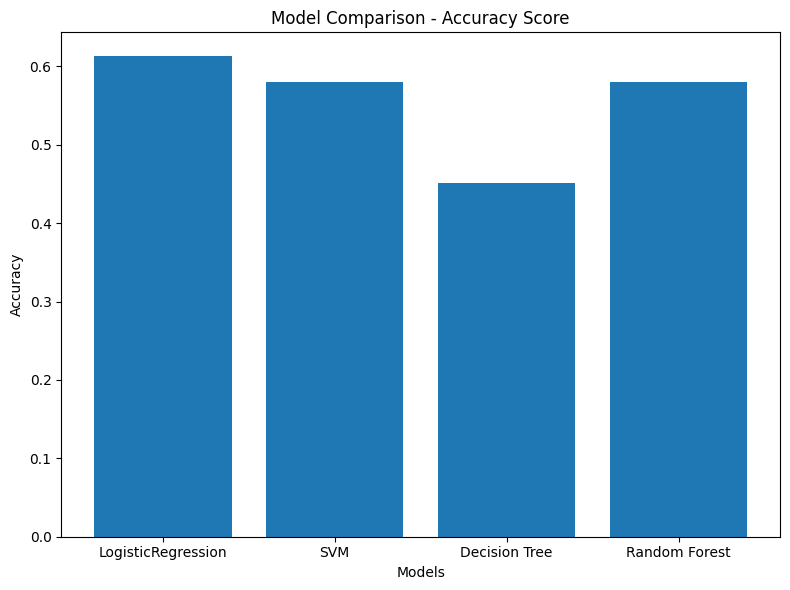

In [245]:
plt.figure(figsize= (8,6))

plt.bar(results.keys(), results.values())

plt.title('Model Comparison - Accuracy Score')

plt.xlabel("Models")

plt.ylabel("Accuracy")

plt.xticks(rotation = 0)

plt.tight_layout()

plt.show()